In [1]:
!pip install qiskit==1.0.2
!pip install qiskit-nature==0.7.2
!pip install pyscf==2.5.0
# !pip install --upgrade pyscf
!pip install pylatexenc==2.10
!pip install qiskit-aer==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=1847e3c0bab7146e0d4e2bcc651b5d889ffccc68f67d56bf32570ff1f5c1

In [2]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
import numpy as np
# from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import JordanWignerMapper, ParityMapper
from qiskit_nature.second_q.circuit.library import UCC,UCCSD, HartreeFock
from qiskit_nature.second_q.algorithms.initial_points import HFInitialPoint
from qiskit_algorithms.optimizers import SLSQP, NELDER_MEAD, SPSA, L_BFGS_B, P_BFGS, GradientDescent, ADAM, SPSA, COBYLA
from qiskit_algorithms.eigensolvers import VQD
from qiskit_algorithms.state_fidelities import ComputeUncompute, BaseStateFidelity
from qiskit.primitives import Estimator, Sampler, BaseEstimator, BackendEstimator
# from qiskit_aer.primitives import Estimator
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_aer import Aer
#from qiskit.providers.aer import AerSimulator
from qiskit import qpy


In [ ]:
dis = 0.25
from qiskit_nature.second_q.mappers import ParityMapper


driver = PySCFDriver(
        # atom= f"H 0 {R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)} ",
        atom = f"H 0 0 0; H 0 0 {dis}; H 0 0 {2*dis}; H 0 0 {3*dis}",
        # atom = f"Li 0 0 0; H 0 0 {dis}",
        # atom = f"H 0 0 0; H 0 0 {dis}",
        basis= 'sto6g',
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )

problem = driver.run()
hamiltonian = problem.hamiltonian
nuc = hamiltonian.nuclear_repulsion_energy
hamiltonian = hamiltonian.second_q_op()

# mapper = JordanWignerMapper()
mapper = ParityMapper(num_particles=problem.num_particles)
qubit_op = mapper.map(hamiltonian)

ansatz = UCC(
  num_spatial_orbitals= problem.num_spatial_orbitals,
  num_particles= [problem.num_alpha, problem.num_beta],
  excitations='sd', # single double
  reps = 1,
  qubit_mapper=mapper,
  initial_state = HartreeFock(
      num_spatial_orbitals= problem.num_spatial_orbitals,
      num_particles= [problem.num_alpha, problem.num_beta],
      qubit_mapper=mapper,
    ),
)

In [ ]:
ansatz = ansatz.decompose()

In [ ]:
len(ansatz)

14

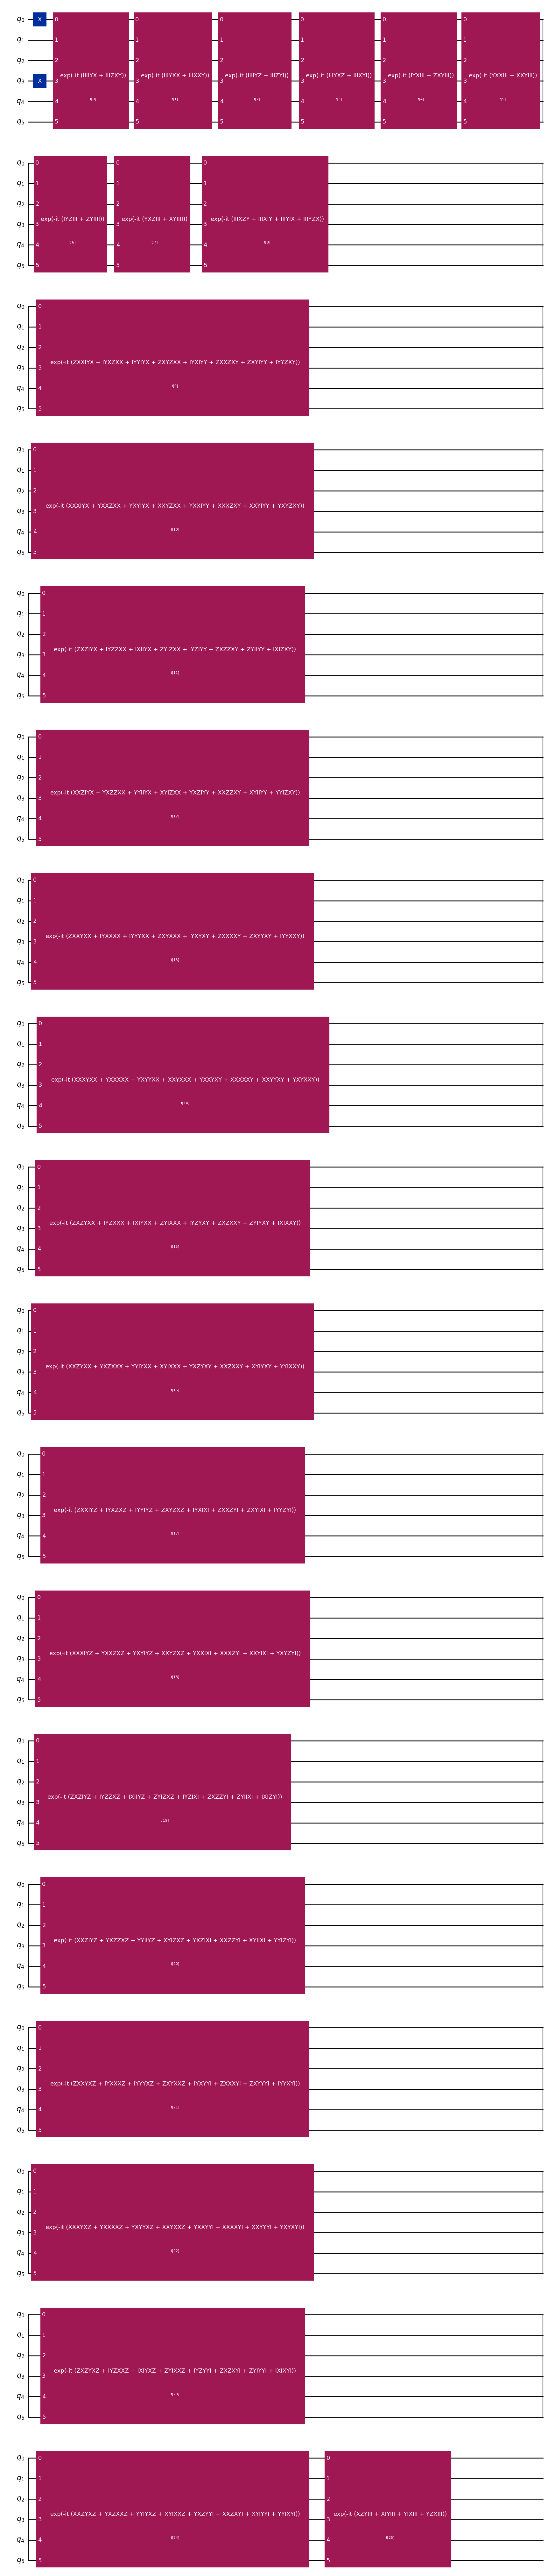

In [ ]:
ansatz.draw('mpl')

In [ ]:
a = ansatz[3]

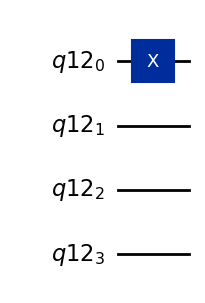

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister

qr = QuantumRegister(4)
quantumcircuit = QuantumCircuit(qr)
quantumcircuit.x(0)

# quantumcircuit = quantumcircuit.compose(ansatz[3])

quantumcircuit.draw('mpl')

In [10]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import RYGate, XGate
from qiskit.circuit import QuantumCircuit, Parameter
from itertools import permutations
from qiskit.circuit.library import EvolvedOperatorAnsatz
# from qiskit.opflow import Z, I, X, Y
from qiskit.quantum_info import SparsePauliOp,Pauli
# from qiskit.opflow import PauliSumOp
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_algorithms.optimizers import SLSQP, NELDER_MEAD, SPSA, L_BFGS_B, P_BFGS, GradientDescent, ADAM, SPSA
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator, Sampler, BaseEstimator, BackendEstimator
import numpy as np

def general_excitation_gate(number_of_qubit, theta=None):
  # theta = Parameter('?')
  if theta == None:
    theta = 0
  quantum_register = QuantumRegister(number_of_qubit)
  quantum_circuit = QuantumCircuit(quantum_register)

  ch_gate = XGate().control(number_of_qubit-1, ctrl_state="0"*int((number_of_qubit-2)/2) + "1" + "0"*int((number_of_qubit-2)/2) )

  # Construct BLOCK 1 CNOT
  if  number_of_qubit >= 4:
    for i in range(1, int(number_of_qubit/2)):
      quantum_circuit.cx(0, i)
  else:
    quantum_circuit.cx(0,1)

  if number_of_qubit >= 4:
    for i in range(1, int(number_of_qubit/2)):
      quantum_circuit.cx(int(number_of_qubit/2), i+int(number_of_qubit/2))

  if number_of_qubit >= 4:
    quantum_circuit.cx(0, int(number_of_qubit/2))


  quantum_circuit.append(ch_gate, list((np.linspace(1, number_of_qubit-1, number_of_qubit-1)).astype(int)) + [0])
  quantum_circuit.ry(theta*-1/2, 0)
  quantum_circuit.append(ch_gate, list((np.linspace(1, number_of_qubit-1, number_of_qubit-1)).astype(int)) + [0])
  quantum_circuit.ry(theta/2, 0)

  if number_of_qubit >= 4:
    quantum_circuit.cx(0, int(number_of_qubit/2))

  # Construc BLOCK 2 CNOT
  if  number_of_qubit >= 4:
    for i in range(int(number_of_qubit/2)-1, 0, -1):
      quantum_circuit.cx(0, i)
  else:
    quantum_circuit.cx(0,1)

  if number_of_qubit >= 4:
    for i in range(int(number_of_qubit/2)-1, 0, -1):
      quantum_circuit.cx(int(number_of_qubit/2), i+int(number_of_qubit/2))
  return quantum_circuit


def hamiltonian_and_excitation(problem, hamiltonian):
  # Basis_state
  # Get all permutations of [1, 2, 3]
  perm = set(permutations(["1"]*problem.num_alpha + ["0"]*int(problem.num_spatial_orbitals/2)))

  # Print the obtained permutations
  string_elements = [''.join(element) for element in perm]

  basis_state = []

  for i in range(len(string_elements)):
    for j in range(len(string_elements)):
      basis_state.append(string_elements[i] + string_elements[j])

  # Define pauli operator by SparsePauliOp
  sigma_plus = SparsePauliOp(["X", "Y"], coeffs=[1/2, -1/2j,], )
  sigma_minus = SparsePauliOp(["X", "Y"], coeffs=[1/2, 1/2j,],)
  I = SparsePauliOp(["I"], coeffs=[1,],)

  # Excitation_operator
  excitation_operators = []
  base_state = (''.join(["1"]*problem.num_alpha + ["0"]*int(problem.num_spatial_orbitals/2) + ["1"]*problem.num_alpha + ["0"]*int(problem.num_spatial_orbitals/2)))[::-1]


  for state in basis_state:
    operator = I.copy()
    reverse_state = state[::-1]
    for i in range(len(reverse_state)):
      position = len(reverse_state) - i - 1
      if position==len(reverse_state) - 0 - 1:
        if reverse_state[position] == '1' and base_state[position] == '0':
          operator = sigma_plus
        if reverse_state[position] == '0' and base_state[position] == '1':
          operator = sigma_minus
      else:
        if reverse_state[position] == '1' and base_state[position] == '0':
          operator = operator.expand(sigma_plus)
        elif reverse_state[position] == '0' and base_state[position] == '1':
          operator = operator.expand(sigma_minus)
        else:
          operator = operator.expand(I)
    # print(operator)
    excitation_operators.append((operator - operator.conjugate().transpose()).simplify())

  commute_of_hamiltonian_and_excitation = []
  for i in range(len(excitation_operators)):
    commute_of_hamiltonian_and_excitation.append((excitation_operators[i] @ qubit_op - qubit_op @ excitation_operators[i]).simplify())

  return commute_of_hamiltonian_and_excitation, basis_state


def Qubit_Excitation_pool(num_alpha, num_qubits, restricted=None):
  perm = set(permutations(["1"]*num_alpha + ["0"]*int(num_qubits/2-num_alpha)))
  string_elements = [''.join(element) for element in perm]
  base_state = (''.join(["1"]*num_alpha + ["0"]*int(num_qubits/2-num_alpha) + ["1"]*num_alpha + ["0"]*int(num_qubits/2-num_alpha)))[::-1]
  # print(f"HF: {base_state}")
  basis_data = {"basis_state": [], "excitation_operators": [], "position": [], "excitation_type": [], "pool_type": []}

  # Define pauli operator by SparsePauliOp
  sigma_plus = SparsePauliOp(["X", "Y"], coeffs=[1/2, -1j/2,], )
  sigma_minus = SparsePauliOp(["X", "Y"], coeffs=[1/2, 1j/2,],)
  I = SparsePauliOp(["I"], coeffs=[1,],)

  for i in range(len(string_elements)):
    for j in range(len(string_elements)):
      basis_data["basis_state"].append(string_elements[i] + string_elements[j])

  # Remove Hatree-Fock State
  basis_data["basis_state"].remove(base_state)

  # Type_of_state
  position_count = []
  for i in range(0, num_alpha):
    position_count.append(i)
  for i in range(int(num_qubits/2), num_alpha + int(num_qubits/2)):
    position_count.append(i)
  # print(position_count)


  for i in range(len(basis_data["basis_state"])):
    check_excitation = 0
    for j in position_count:
      if basis_data["basis_state"][i][::-1][j] == "0":
        check_excitation += 1
    # print(basis_data["basis_state"][i])
    # print(check_excitation)
    if check_excitation == 1:
      basis_data["excitation_type"].append("single")
    elif check_excitation == 2:
      basis_data["excitation_type"].append("double")
    elif check_excitation == 3:
      basis_data["excitation_type"].append("triple")
    elif check_excitation == 4:
      basis_data["excitation_type"].append("quadruple")
    elif check_excitation == 5:
      basis_data["excitation_type"].append("quintuple")
    elif check_excitation == 6:
      basis_data["excitation_type"].append("sextuple")
    elif check_excitation == 7:
      basis_data["excitation_type"].append("septuple")
    elif check_excitation == 8:
      basis_data["excitation_type"].append("octuple")
    else:
      basis_data["excitation_type"].append("Unknown")

  # Retricted to single and double
  if restricted == "single_double_excitation":
    non_single_double_excitation_state = []
    for i in range(len(basis_data["excitation_type"])):
      if basis_data["excitation_type"][i] != "single" and basis_data["excitation_type"][i] != "double":
        non_single_double_excitation_state.append(basis_data["basis_state"][i])
    # print(non_single_double_excitation_state)
    for state in (non_single_double_excitation_state):
      basis_data["excitation_type"].pop(basis_data["basis_state"].index(state))
      basis_data["basis_state"].remove(state)

  #Retricted to single, double, triple and quadruple
  if restricted == "single_double_triple_quadruple_excitation":
    non_single_double_excitation_state = []
    for i in range(len(basis_data["excitation_type"])):
      if basis_data["excitation_type"][i] != "single" and basis_data["excitation_type"][i] != "double" and basis_data["excitation_type"][i] != "triple" and basis_data["excitation_type"][i] != "quadruple":
        non_single_double_excitation_state.append(basis_data["basis_state"][i])
    # print(non_single_double_excitation_state)
    for state in (non_single_double_excitation_state):
      basis_data["excitation_type"].pop(basis_data["basis_state"].index(state))
      basis_data["basis_state"].remove(state)

  for _ in range(len(basis_data["basis_state"])):
    basis_data["pool_type"].append("QubitExcitationBased")

  # Exciation_operator
  for state in basis_data["basis_state"]:
    operator = I.copy()
    reverse_state = state[::-1]
    for i in range(len(reverse_state)):
      if i == 0:
        if reverse_state[i] == '1' and base_state[::-1][i] == '0':
          operator = sigma_plus
        if reverse_state[i] == '0' and base_state[::-1][i] == '1':
          operator = sigma_minus
      else:
        if reverse_state[i] == '1' and base_state[::-1][i] == '0':
          operator = operator.expand(sigma_plus)
        elif reverse_state[i] == '0' and base_state[::-1][i] == '1':
          operator = operator.expand(sigma_minus)
        else:
          operator = operator.expand(I)

    basis_data["excitation_operators"].append((operator - operator.conjugate().transpose()).simplify())

  # Position of annhilation and creation operator
  for state in basis_data["basis_state"]:
    position_annhilation = []
    position_creation = []

    for i in range(0, num_alpha):
      initial_base_state = base_state[::-1]
      initial_basis_data = state[::-1]

      if initial_base_state[i] != initial_basis_data[i]:
        position_annhilation.append(i)

    for i in range(int(num_qubits/2), int(num_qubits/2)+num_alpha):
      initial_base_state = base_state[::-1]
      initial_basis_data = state[::-1]

      if initial_base_state[i] != initial_basis_data[i]:
        position_annhilation.append(i)

    for i in range(num_alpha, int(num_qubits/2)):
      initial_base_state = base_state[::-1]
      initial_basis_data = state[::-1]

      if initial_base_state[i] != initial_basis_data[i]:
        position_creation.append(i)

    for i in range(int(num_qubits/2)+num_alpha, num_qubits):
      initial_base_state = base_state[::-1]
      initial_basis_data = state[::-1]

      if initial_base_state[i] != initial_basis_data[i]:
        position_creation.append(i)

    position = position_annhilation + position_creation

    basis_data["position"].append(position)

  return basis_data



def AdaptVQE(hamiltonian, nuclear_energy, ansatz, num_alpha, optimizer, pool, restricted=None):
  """
  Return Adapt interation
  """
  basis_data = pool
  # print(basis_data)
  if restricted == "single_double_excitation":
    data = {"energys": [], "Singles": [], "Doubles": []}
  elif restricted == "single_double_triple_quadruple_excitation":
    data = {"energys": [], "Singles": [], "Doubles": [], "Triples": [], "Quadruples": []}
  else:
    data = {"energys": [], "Singles": [], "Doubles": [], "Triples": [], "Quadruples": [], "Quintuples": [], "Sextuples": [], "Septuple": [], "Octuple": [], "Unknown": []}
  # print(data)
  quantum_circuit = ansatz.copy()

  internal_initial_point = None

  commute_of_hamiltonian_and_excitation = []
  for i in range(len(basis_data["excitation_operators"])):
    commute_of_hamiltonian_and_excitation.append((basis_data["excitation_operators"][i] @ hamiltonian - hamiltonian @ basis_data["excitation_operators"][i]).simplify())

  print(basis_data['basis_state'])
  print(commute_of_hamiltonian_and_excitation)
  position_count = []
  for i in range(0, num_alpha):
    position_count.append(i)
  for i in range(int(ansatz.num_qubits/2), num_alpha + int(ansatz.num_qubits/2)):
    position_count.append(i)

  # print(position_count)

  step = 0
  while True:
    step += 1
    if step == 20:
      break
    thetas = ParameterVector('$\theta$', quantum_circuit.num_parameters+1)
    # print(thetas)

    # print(quantum_circuit)
    norm_gradient = []

    if restricted == "single_double_excitation":
      single = 0
      double = 0
    elif restricted == "single_double_triple_quadruple_excitation":
      single = 0
      double = 0
      triple = 0
      quadruple = 0
    else:
      single = 0
      double = 0
      triple = 0
      quadruple = 0
      quintuple = 0
      sextuple = 0
      septuple = 0
      unknown = 0

    if restricted == "single_double_excitation":
      for i in range(len(commute_of_hamiltonian_and_excitation)):
        estimator = Estimator().run(quantum_circuit, commute_of_hamiltonian_and_excitation[i], internal_initial_point)
        norm_gradient.append(np.abs(estimator.result().values[0]))
        if basis_data["excitation_type"][i] == "single":
          single += (np.abs(estimator.result().values[0]))
        elif basis_data["excitation_type"][i] == "double":
          double += np.abs(estimator.result().values[0])
      data["Singles"].append(single)
      data["Doubles"].append(double)
    elif restricted == "single_double_triple_quadruple_excitation":
      for i in range(len(commute_of_hamiltonian_and_excitation)):
        estimator = Estimator().run(quantum_circuit, commute_of_hamiltonian_and_excitation[i], internal_initial_point)
        norm_gradient.append(np.abs(estimator.result().values[0]))
        if basis_data["excitation_type"][i] == "single":
          single += (np.abs(estimator.result().values[0]))
        elif basis_data["excitation_type"][i] == "double":
          double += np.abs(estimator.result().values[0])
        elif basis_data["excitation_type"][i] == "triple":
         triple += np.abs(estimator.result().values[0])
        elif basis_data["excitation_type"][i] == "quadruple":
          quadruple += np.abs(estimator.result().values[0])
      data["Singles"].append(single)
      data["Doubles"].append(double)
      data["Triples"].append(triple)
      data["Quadruples"].append(quadruple)
    else:
      for i in range(len(commute_of_hamiltonian_and_excitation)):
        estimator = Estimator().run(quantum_circuit, commute_of_hamiltonian_and_excitation[i], internal_initial_point)
        norm_gradient.append(np.abs(estimator.result().values[0]))
        if basis_data["excitation_type"][i] == "single":
          single += (np.abs(estimator.result().values[0]))
        elif basis_data["excitation_type"][i] == "double":
          double += np.abs(estimator.result().values[0])
        elif basis_data["excitation_type"][i] == "triple":
         triple += np.abs(estimator.result().values[0])
        elif basis_data["excitation_type"][i] == "quadruple":
          quadruple += np.abs(estimator.result().values[0])
        elif basis_data["excitation_type"][i] == "quintuple":
          quintuple += np.abs(estimator.result().values[0])
        elif basis_data["excitation_type"][i] == "sextuple":
          sextuple += np.abs(estimator.result().values[0])
        elif basis_data["excitation_type"][i] == "septuple":
          septuple += np.abs(estimator.result().values[0])
        elif basis_data["excitation_type"][i] == "octuple":
          octuple += np.abs(estimator.result().values[0])
        else:
          unknown += np.abs(estimator.result().values[0])
      data["Singles"].append(single)
      data["Doubles"].append(double)
      data["Triples"].append(triple)
      data["Quadruples"].append(quadruple)
      data["Quintuple"].append(quintuple)
      data["Sextuple"].append(sextuple)
      data["Septuple"].append(septuple)
      data["Octuple"].append(octuple)
      data["Unknown"].append(unknown)


    max_norm_position = norm_gradient.index(max(norm_gradient))

    print("Norm: ", norm_gradient)
    print(max(norm_gradient))
    # print("State:", basis_data["basis_state"][max_norm_position])


    if internal_initial_point == None:
      if basis_data["pool_type"][max_norm_position] == "QubitExcitationBased":
        quantum_circuit = quantum_circuit.compose(general_excitation_gate(len(basis_data["position"][max_norm_position]), thetas[0]), basis_data["position"][max_norm_position])
        internal_initial_point = [0]
      # quantum_circuit = quantum_circuit.assign_parameters(internal_initial_point)

      # VQE part
      estimator = Estimator()
      vqe = VQE(estimator = estimator, ansatz = quantum_circuit, optimizer=optimizer, initial_point=internal_initial_point)
      result1 = vqe.compute_minimum_eigenvalue(hamiltonian)
      energy = result1.eigenvalue.real
      data["energys"].append(energy + nuclear_energy)
      print("Energy: ", energy + nuclear_energy)
      internal_initial_point = list(result1.optimal_point)

    else:
      if basis_data["pool_type"][max_norm_position] == "QubitExcitationBased":
        quantum_circuit = quantum_circuit.compose(general_excitation_gate(len(basis_data["position"][max_norm_position]), thetas[quantum_circuit.num_parameters]), basis_data["position"][max_norm_position])

      # VQE part
      estimator = Estimator()
      vqe = VQE(estimator = estimator, ansatz = quantum_circuit, optimizer=optimizer, initial_point = list(internal_initial_point) + [0])
      result1 = vqe.compute_minimum_eigenvalue(hamiltonian)
      energy = result1.eigenvalue.real
      internal_initial_point = list(result1.optimal_point)
      data["energys"].append(energy + nuclear_energy)
      print("Energy: ", energy + nuclear_energy)

    if max(norm_gradient) <= 10**(-3):
      break

    # basis_data['basis_state'].pop(max_norm_position)
    # basis_data['position'].pop(max_norm_position)
    # basis_data['excitation_operators'].pop(max_norm_position)
    # commute_of_hamiltonian_and_excitation.pop(max_norm_position)
  return data


In [ ]:
list_data = Qubit_Excitation_pool(1, 4, restricted="single_double_excitation")

In [47]:
distance = [0.25]
basis_set = 'sto6g'
energys = []

restricted = "single_double_excitation"
# ansatz.draw('mpl')

for i, dis in enumerate(distance):
  driver = PySCFDriver(
          # atom= f"H 0 {R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)} ",
          # atom = f"H 0 0 0; H 0 0 {dis}; H 0 0 {2*dis}; H 0 0 {3*dis}",
          # atom = f"H 0 0 0; H 0 0 {dis}; H 0 0 {2*dis}",
          atom = f"H 0 0 0; H 0 0 {dis}",
          basis= basis_set,
          charge=0,
          spin=0,
          unit=DistanceUnit.ANGSTROM,
      )

  problem = driver.run()
  hamiltonian = problem.hamiltonian
  nuc = hamiltonian.nuclear_repulsion_energy
  hamiltonian = hamiltonian.second_q_op()

  mapper = JordanWignerMapper()
  qubit_op = mapper.map(hamiltonian)

  pool = Qubit_Excitation_pool(problem.num_alpha, 2*problem.num_spatial_orbitals, restricted)
  # print(pool["pool_type"])

  ansatz = QuantumCircuit(problem.num_spatial_orbitals*2)
  ansatz.x(i for i in range(0, problem.num_alpha))
  ansatz.x(i for i in range(int(problem.num_spatial_orbitals), problem.num_alpha + int(problem.num_spatial_orbitals)))

  interation= 100
  optimizer = ADAM(maxiter=interation, tol=1e-06, lr=0.001, beta_1=0.9, beta_2=0.99)

  data = AdaptVQE(qubit_op, nuc, ansatz, problem.num_alpha, optimizer, pool, restricted)

['1010', '1001', '0110']
[SparsePauliOp(['XXXX', 'XXYY', 'XYXY', 'YXXY', 'ZZZI', 'IIZI', 'ZZIZ', 'IIIZ', 'XYYX', 'YXYX', 'YYXX', 'ZIZZ', 'IZZZ', 'ZIII', 'IZII', 'YYYY'],
              coeffs=[-0.45797472+0.j, -0.45797472+0.j,  0.45797472+0.j, -0.45797472+0.j,
  0.03989523+0.j, -0.03989523+0.j, -0.03989523+0.j,  0.03989523+0.j,
 -0.45797472+0.j,  0.45797472+0.j, -0.45797472+0.j,  0.03989523+0.j,
 -0.03989523+0.j, -0.03989523+0.j,  0.03989523+0.j, -0.45797472+0.j]), SparsePauliOp(['XXII', 'YYII', 'XXIZ', 'YYIZ', 'ZIYY', 'IZYY', 'ZIXX', 'IZXX', 'XXZI', 'YYZI'],
              coeffs=[-0.91594945+0.j, -0.91594945+0.j, -0.00174582+0.j, -0.00174582+0.j,
 -0.07979047+0.j,  0.07979047+0.j, -0.07979047+0.j,  0.07979047+0.j,
  0.0113542 +0.j,  0.0113542 +0.j]), SparsePauliOp(['IIXX', 'IIYY', 'IZXX', 'ZIXX', 'YYZI', 'XXZI', 'YYIZ', 'XXIZ', 'IZYY', 'ZIYY'],
              coeffs=[-0.91594945+0.j, -0.91594945+0.j, -0.00174582+0.j,  0.0113542 +0.j,
 -0.07979047+0.j, -0.07979047+0.j,  0.07979047+0.j,  

In [14]:
print(pool['basis_state'])
print(pool['excitation_type'])

['10011001', '10011010', '10010101', '10010011', '10010110', '10101001', '10101010', '10100101', '10100011', '10100110', '01011001', '01011010', '01010101', '01010011', '01010110', '11000011', '00111001', '00111010', '00110101', '00111100', '00110110', '01101001', '01101010', '01100101', '01100011', '01100110']
['double', 'double', 'double', 'single', 'double', 'double', 'double', 'double', 'single', 'double', 'double', 'double', 'double', 'single', 'double', 'double', 'single', 'single', 'single', 'double', 'single', 'double', 'double', 'double', 'single', 'double']


In [15]:
print(data)

{'energys': [1.5256543162682066, 1.5230636739495296, 1.5221680808512055, 1.5212711338029559, 1.5207897606821215, 1.5203072634266226, 1.5196811676397735, 1.5190537269470132, 1.5190348285763786, 1.519015869113022, 1.5190082560516611, 1.5190017908184696, 1.5190017778541929], 'Singles': [2.1427151386532728e-08, 0.027623037906904298, 0.027956254928947412, 0.02343999038891781, 0.018885279341681147, 0.021631224227107337, 0.016928261313625657, 0.018863532000235647, 0.020466181612050483, 0.02060898823093605, 0.020744514863219675, 0.010060634392463335, 0.0009747922250445281], 'Doubles': [1.7383967362445676, 1.4796093372966148, 1.2049461066671696, 0.9931610809059735, 0.7804728876930187, 0.5850526456374723, 0.3991337909467966, 0.22917241413100506, 0.06108176763299485, 0.030956840708423312, 0.0013123779823137269, 0.0013357925272862977, 0.0022226413617802768]}


In [43]:
len(data['energys'])

13

In [34]:
length = np.arange(0,12,13)
print(length)

[0]


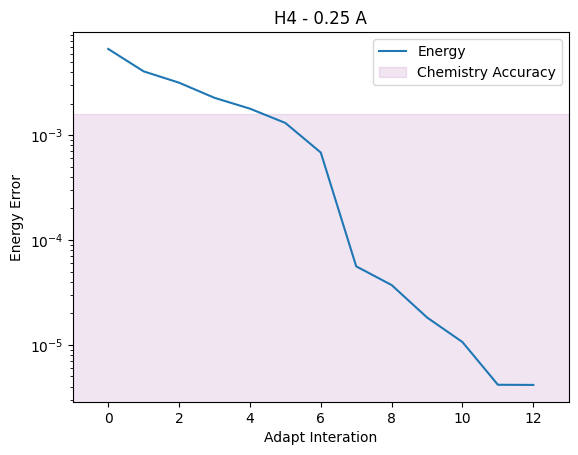

In [45]:
import matplotlib.pyplot as plt
plt.plot(np.array(data['energys'])-1.5189976313400484, label='Energy')
plt.yscale('log')
length = np.linspace(-1,13,15)
plt.fill_between(length, np.zeros(len(length)), np.zeros(len(length)) + 1.6 * 1e-3 , color='purple', alpha=.1, label='Chemistry Accuracy')
plt.xlim(-1,13)
plt.xlabel("Adapt Interation")
plt.ylabel("Energy Error")
plt.title("H4 - 0.25 A")
plt.legend()

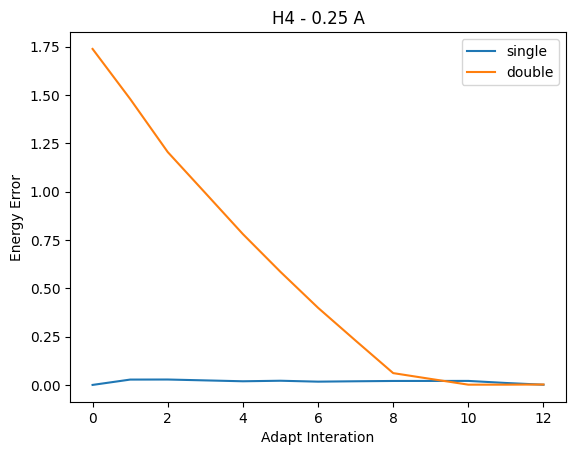

In [41]:
plt.plot(np.array(data['Singles']), label='single')
plt.plot(np.array(data['Doubles']), label='double')
plt.xlabel("Adapt Interation")
plt.ylabel("Energy Error")
plt.title("H4 - 0.25 A")
plt.legend()